In [451]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [452]:
import numpy as np
import pandas as pd
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
#and visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [456]:
soup4= BeautifulSoup(open('s&p500.html'),'html.parser')

In [457]:
headlines2 = soup4.find('table',{'class':'W(100%) M(0)'})
names2 = []
for row in headlines2.findAll('th')[0:]:
    name = row.findAll('span')[0].text
    names2.append(name)
names2    

['Date', 'Open', 'High', 'Low', 'Close*', 'Adj. close**', 'Volume']

In [458]:
html_data2 = soup4.find('tbody')
dates = []
for date in html_data2.findAll('tr')[0:]:
    temp = date.findAll('span')[0].text
    dates.append(temp)


In [459]:
opens = []
for date in html_data2.findAll('tr')[0:]:
    temp = date.findAll('span')[1].text
    opens.append(temp)


In [460]:
high = []
for i in html_data2.findAll('tr')[0:]:
    temp = i.findAll('span')[2].text
    high.append(temp)


In [461]:
low = []
for i in html_data2.findAll('tr')[0:]:
    temp = i.findAll('span')[3].text
    low.append(temp)


In [462]:
close = []
for i in html_data2.findAll('tr')[0:]:
    temp = i.findAll('span')[4].text
    close.append(temp)
    

In [463]:
volume = []
for i in html_data2.findAll('tr')[0:]:
    temp = i.findAll('span')[6].text
    volume.append(temp)
    

In [464]:
price =[]
for i in html_data2.findAll('tr')[0:]:
    temp = i.findAll('span')[5].text
    price.append(temp)

In [465]:
df = pd.DataFrame(columns = names2)
NewDate = []
df['NewDate'] = NewDate

In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          0 non-null      object 
 1   Open          0 non-null      object 
 2   High          0 non-null      object 
 3   Low           0 non-null      object 
 4   Close*        0 non-null      object 
 5   Adj. close**  0 non-null      object 
 6   Volume        0 non-null      object 
 7   NewDate       0 non-null      float64
dtypes: float64(1), object(7)
memory usage: 0.0+ bytes


In [467]:
df['Date'] = dates
df['Open'] = opens
df['High'] = high
df['Low'] = low
df['Close*']= close
df['Volume']= volume
df['price']= price
del df['Adj. close**']

In [468]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close*        0
Volume        0
NewDate    2769
price         0
dtype: int64

In [469]:
df

,Date,Open,High,Low,Close*,Volume,NewDate,price
0,29 Dec 2021,"4,788.64","4,804.06","4,778.08","4,793.06","2,369,370,000",NaN,"4,793.06"
1,28 Dec 2021,"4,795.49","4,807.02","4,780.04","4,786.35","2,217,050,000",NaN,"4,786.35"
2,27 Dec 2021,"4,733.99","4,791.49","4,733.99","4,791.19","2,264,120,000",NaN,"4,791.19"
3,23 Dec 2021,"4,703.96","4,740.74","4,703.96","4,725.79","2,194,630,000",NaN,"4,725.79"
4,22 Dec 2021,"4,650.36","4,697.67","4,645.53","4,696.56","2,439,570,000",NaN,"4,696.56"
...,...,...,...,...,...,...,...,...
2764,05 Jan 2011,"1,268.78","1,277.63","1,265.36","1,276.56","4,764,920,000",NaN,"1,276.56"
2765,04 Jan 2011,"1,272.95","1,274.12","1,262.66","1,270.20","4,796,420,000",NaN,"1,270.20"
2766,03 Jan 2011,"1,257.62","1,276.17","1,257.62","1,271.87","4,286,670,000",NaN,"1,271.87"
2767,31 Dec 2010,"1,256.76","1,259.34","1,254.19","1,257.64","1,799,770,000",NaN,"1,257.64"


In [433]:
pd.to_datetime(df['Date'])
df['Open']=df['Open'].str.replace(',','')
df['High']=df['High'].str.replace(',','')
df['Low']=df['Low'].str.replace(',','')
df['Close*']=df['Close*'].str.replace(',','')
df['Volume']=df['Volume'].str.replace(',','')
df['price']=df['price'].str.replace(',','')
df

,Date,Open,High,Low,Close*,Volume,NewDate,price
0,29 Dec 2021,4788.64,4804.06,4778.08,4793.06,2369370000,NaN,4793.06
1,28 Dec 2021,4795.49,4807.02,4780.04,4786.35,2217050000,NaN,4786.35
2,27 Dec 2021,4733.99,4791.49,4733.99,4791.19,2264120000,NaN,4791.19
3,23 Dec 2021,4703.96,4740.74,4703.96,4725.79,2194630000,NaN,4725.79
4,22 Dec 2021,4650.36,4697.67,4645.53,4696.56,2439570000,NaN,4696.56
...,...,...,...,...,...,...,...,...
2764,05 Jan 2011,1268.78,1277.63,1265.36,1276.56,4764920000,NaN,1276.56
2765,04 Jan 2011,1272.95,1274.12,1262.66,1270.20,4796420000,NaN,1270.20
2766,03 Jan 2011,1257.62,1276.17,1257.62,1271.87,4286670000,NaN,1271.87
2767,31 Dec 2010,1256.76,1259.34,1254.19,1257.64,1799770000,NaN,1257.64


In [434]:
for col in df.columns:
    if col=='Date':
        continue
    else:
        df[col]=pd.to_numeric(df[col])  


In [435]:
df['NewDate'] = (pd.Series(df['Date']).str.replace('Jan', '01', regex=True).str.replace('Feb', '02', regex=True)
.str.replace('Mar', '03', regex=True).str.replace('Apr', '04', regex=True).str.replace('May', '05', regex=True)
.str.replace('Jun', '06', regex=True).str.replace('Jul', '07', regex=True).str.replace('Aug', '08', regex=True)
.str.replace('Sept', '09', regex=True).str.replace('Oct', '10', regex=True).str.replace('Nov', '11', regex=True)
.str.replace('Dec', '12', regex=True))


In [436]:
df['NewDate']=df['NewDate'].str.replace(' ','-')
df

,Date,Open,High,Low,Close*,Volume,NewDate,price
0,29 Dec 2021,4788.64,4804.06,4778.08,4793.06,2369370000,29-12-2021,4793.06
1,28 Dec 2021,4795.49,4807.02,4780.04,4786.35,2217050000,28-12-2021,4786.35
2,27 Dec 2021,4733.99,4791.49,4733.99,4791.19,2264120000,27-12-2021,4791.19
3,23 Dec 2021,4703.96,4740.74,4703.96,4725.79,2194630000,23-12-2021,4725.79
4,22 Dec 2021,4650.36,4697.67,4645.53,4696.56,2439570000,22-12-2021,4696.56
...,...,...,...,...,...,...,...,...
2764,05 Jan 2011,1268.78,1277.63,1265.36,1276.56,4764920000,05-01-2011,1276.56
2765,04 Jan 2011,1272.95,1274.12,1262.66,1270.20,4796420000,04-01-2011,1270.20
2766,03 Jan 2011,1257.62,1276.17,1257.62,1271.87,4286670000,03-01-2011,1271.87
2767,31 Dec 2010,1256.76,1259.34,1254.19,1257.64,1799770000,31-12-2010,1257.64


In [437]:
del df['Date']
df

,Open,High,Low,Close*,Volume,NewDate,price
0,4788.64,4804.06,4778.08,4793.06,2369370000,29-12-2021,4793.06
1,4795.49,4807.02,4780.04,4786.35,2217050000,28-12-2021,4786.35
2,4733.99,4791.49,4733.99,4791.19,2264120000,27-12-2021,4791.19
3,4703.96,4740.74,4703.96,4725.79,2194630000,23-12-2021,4725.79
4,4650.36,4697.67,4645.53,4696.56,2439570000,22-12-2021,4696.56
...,...,...,...,...,...,...,...
2764,1268.78,1277.63,1265.36,1276.56,4764920000,05-01-2011,1276.56
2765,1272.95,1274.12,1262.66,1270.20,4796420000,04-01-2011,1270.20
2766,1257.62,1276.17,1257.62,1271.87,4286670000,03-01-2011,1271.87
2767,1256.76,1259.34,1254.19,1257.64,1799770000,31-12-2010,1257.64


In [438]:
df['NewDate'] = pd.to_datetime(df.NewDate,format='%d-%m-%Y')
df = df.sort_values(by="NewDate")
df.reindex(index=df.index[::-1])
#df.index = df['NewDate']
df

,Open,High,Low,Close*,Volume,NewDate,price
2768,1259.44,1261.09,1256.32,1257.88,1970720000,2010-12-30,1257.88
2767,1256.76,1259.34,1254.19,1257.64,1799770000,2010-12-31,1257.64
2766,1257.62,1276.17,1257.62,1271.87,4286670000,2011-01-03,1271.87
2765,1272.95,1274.12,1262.66,1270.20,4796420000,2011-01-04,1270.20
2764,1268.78,1277.63,1265.36,1276.56,4764920000,2011-01-05,1276.56
...,...,...,...,...,...,...,...
4,4650.36,4697.67,4645.53,4696.56,2439570000,2021-12-22,4696.56
3,4703.96,4740.74,4703.96,4725.79,2194630000,2021-12-23,4725.79
2,4733.99,4791.49,4733.99,4791.19,2264120000,2021-12-27,4791.19
1,4795.49,4807.02,4780.04,4786.35,2217050000,2021-12-28,4786.35


In [439]:
df['month'] = df['NewDate'].dt.month
df

,Open,High,Low,Close*,Volume,NewDate,price,month
2768,1259.44,1261.09,1256.32,1257.88,1970720000,2010-12-30,1257.88,12
2767,1256.76,1259.34,1254.19,1257.64,1799770000,2010-12-31,1257.64,12
2766,1257.62,1276.17,1257.62,1271.87,4286670000,2011-01-03,1271.87,1
2765,1272.95,1274.12,1262.66,1270.20,4796420000,2011-01-04,1270.20,1
2764,1268.78,1277.63,1265.36,1276.56,4764920000,2011-01-05,1276.56,1
...,...,...,...,...,...,...,...,...
4,4650.36,4697.67,4645.53,4696.56,2439570000,2021-12-22,4696.56,12
3,4703.96,4740.74,4703.96,4725.79,2194630000,2021-12-23,4725.79,12
2,4733.99,4791.49,4733.99,4791.19,2264120000,2021-12-27,4791.19,12
1,4795.49,4807.02,4780.04,4786.35,2217050000,2021-12-28,4786.35,12


Text(0, 0.5, 'USD')

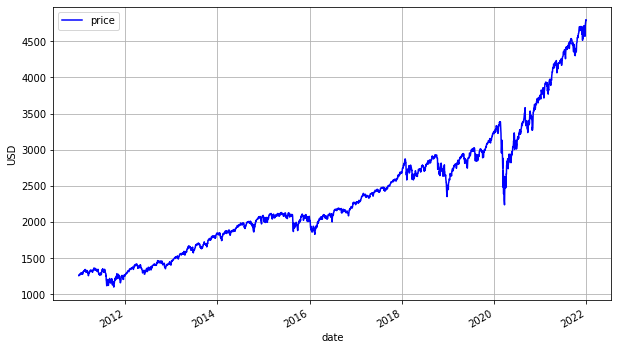

In [440]:
ax = df.plot(x='NewDate', y='price', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")


In [450]:
df1 = df[['price','NewDate']].copy()
df1
df2 = df1.set_index((df.select_dtypes(include=[np.datetime64]).columns).tolist())
df3 = df.set_index((df.select_dtypes(include=[np.datetime64]).columns).tolist())
df1
df1 = df1.reset_index()
del df1['index']
df1

,price,NewDate
0,1257.88,2010-12-30
1,1257.64,2010-12-31
2,1271.87,2011-01-03
3,1270.20,2011-01-04
4,1276.56,2011-01-05
...,...,...
2764,4696.56,2021-12-22
2765,4725.79,2021-12-23
2766,4791.19,2021-12-27
2767,4786.35,2021-12-28


In [360]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

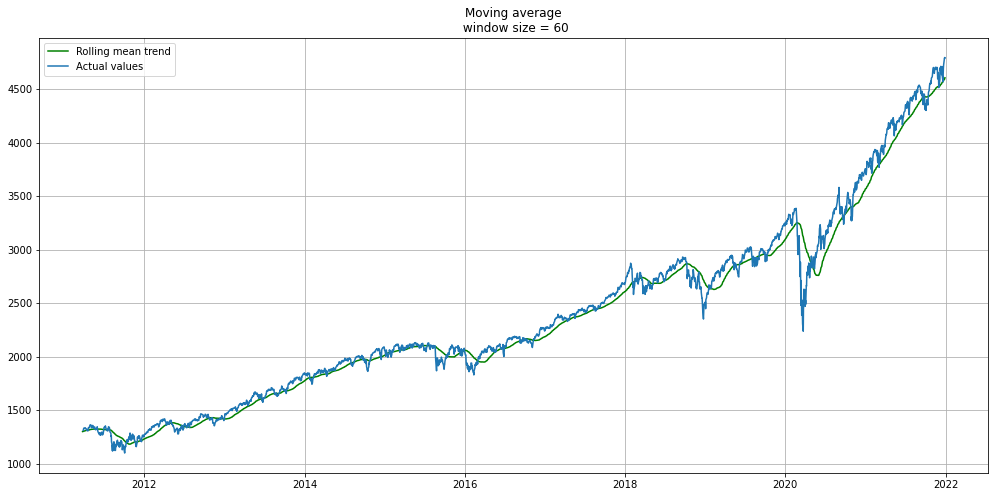

In [361]:
plot_moving_average(df2.price, 60)



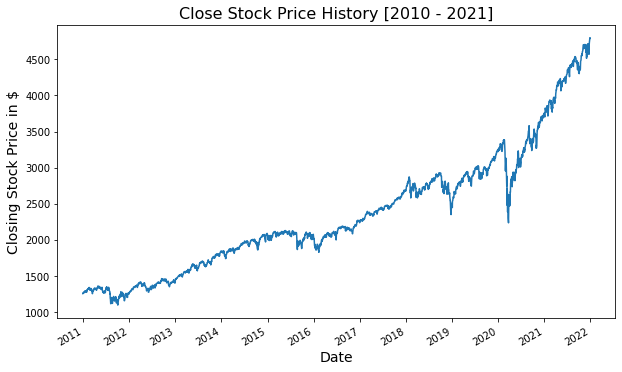

In [362]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format


fig, ax = plt.subplots()
ax.plot(df1['NewDate'], df1['price'])


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)


plt.title('Close Stock Price History [2010 - 2021]', fontsize=16)

plt.xlabel('Date', fontsize=14)

plt.ylabel('Closing Stock Price in $', fontsize=14)

fig.autofmt_xdate()
plt.show()

In [449]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train, test = train_test_split(df1, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['price']


In [364]:

from scipy import stats
model = LinearRegression()

model.fit(X_train, y_train)
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
#print('Intercept: ', model.intercept_)


Slope:  1.0191476702702391


<ipython-input-364-26a9532beb6d>:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))# The Intercept


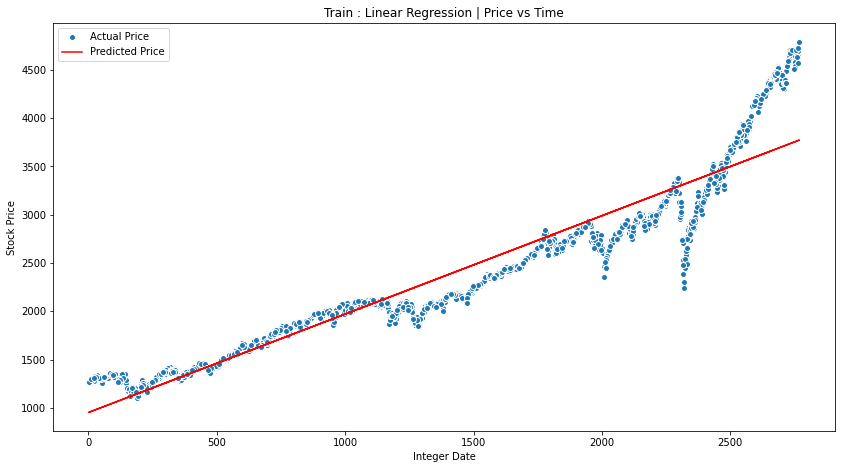

In [446]:
plt.figure(1, figsize=(14,7.5))
plt.title('Train : Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [366]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['price']

In [367]:
y_pred = model.predict(X_test)

df1['predict'] = model.predict(np.array(df1.index).reshape(-1, 1))


In [368]:
randints = np.random.randint(len(df1), size=20)

df_sample = df1[df1.index.isin(randints)]
df_sample = df_sample.sort_values('price')


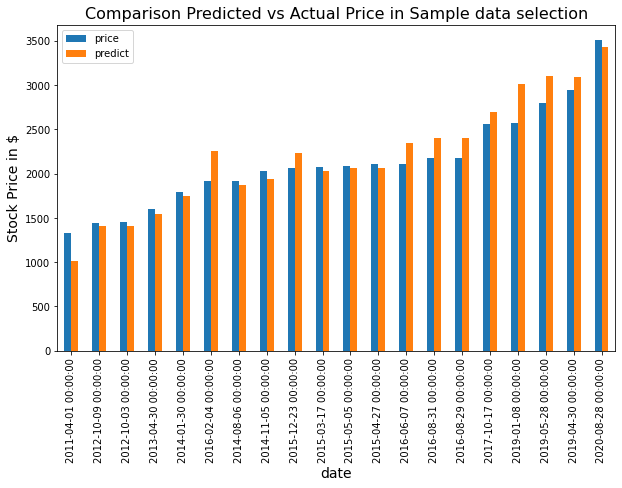

In [369]:
fig, ax = plt.subplots()
df_sample.plot(x='NewDate', y=['price', 'predict'], kind='bar', ax=ax)

plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)
 

plt.xlabel('date', fontsize=14)

plt.ylabel('Stock Price in $', fontsize=14)

plt.show()

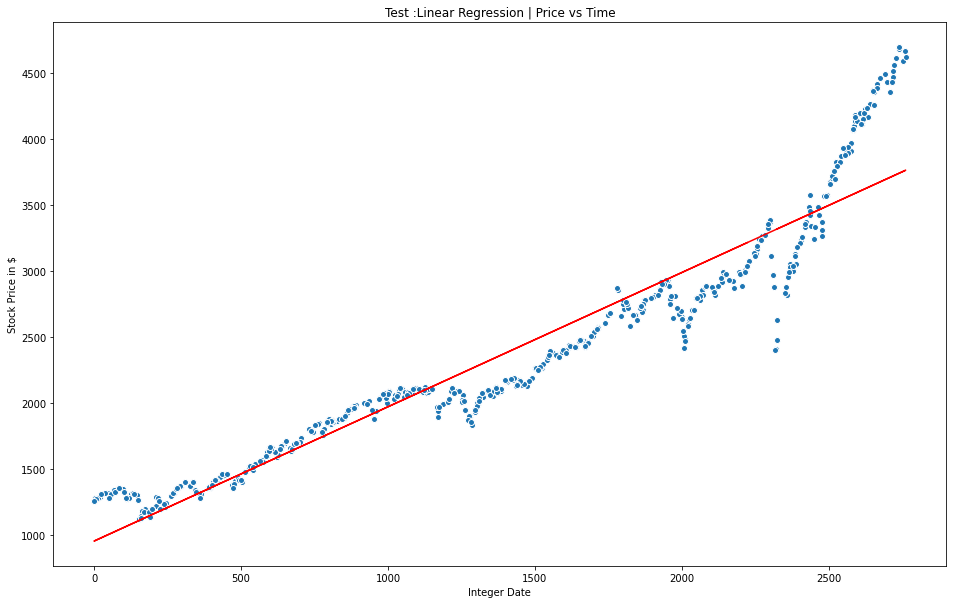

In [370]:
plt.figure(1, figsize=(16,10))
plt.title('Test :Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()

In [371]:
from sklearn import metrics
df1['price'].describe()

count    2769.000000
mean     2359.925565
std       858.410963
min      1099.230000
25%      1698.670000
50%      2124.200000
75%      2842.740000
max      4793.060000
Name: price, dtype: float64

In [372]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
metrics.mean_absolute_error(y_test, y_pred)/df1['price'].describe().mean()

Mean Absolute Error: 194.05269767360215


0.0837099909225247

In [373]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9008628688303982


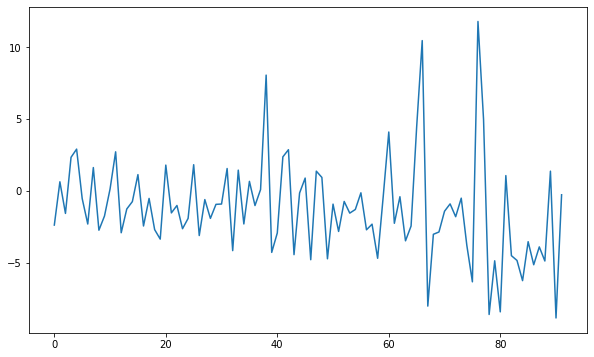

In [324]:
new_df = pd.DataFrame(index=range(0,len(df)),columns=['Close'])
close = df['Close*'].to_numpy()    
new_df['Close'] = close
new_df = new_df[::-1]
times = []
dates = []
j=0
for i in range(0,len(new_df)-9,30):
    y1 = new_df['Close'][i+30]
    y2 = new_df['Close'][i]
    m = (y2-y1)/30
    
    times.append(m)
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
month = [1,2,3,4,5,6,7,8,9,10,11,12]
for j in years:
    for k in month:
        tmp = [k,j]
        dates.append(tmp)
plt.plot(times)       

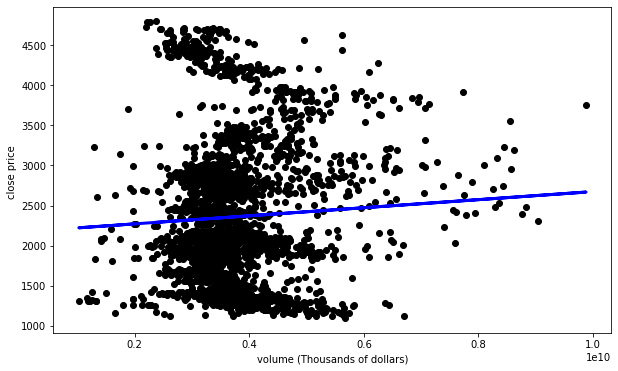

R2: 0.0028583512488383755


In [447]:
m = linear_model.LinearRegression() 

x = df['Volume'].values.reshape(df['Volume'].shape[0],1)
y = df['Close*'].values.reshape(df['Close*'].shape[0],1)

m.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, m.predict(x), color='blue', linewidth=3)

plt.xlabel('volume (Thousands of dollars)')
plt.ylabel('close price ')
plt.show()

print("R2:",m.score(x,y))

In [470]:
df1

,price,NewDate
0,1257.88,2010-12-30
1,1257.64,2010-12-31
2,1271.87,2011-01-03
3,1270.20,2011-01-04
4,1276.56,2011-01-05
...,...,...
2764,4696.56,2021-12-22
2765,4725.79,2021-12-23
2766,4791.19,2021-12-27
2767,4786.35,2021-12-28


In [538]:
df1['year'] = pd.DatetimeIndex(df1['NewDate']).year
value = np.array(df1['price']) 
year = np.array(df1['year']) 


numpy.int64

([<matplotlib.axis.XTick at 0x7f9319955e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

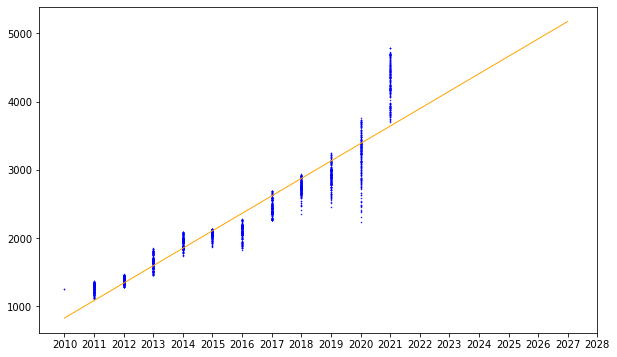

In [542]:
years_extended = np.arange(2010, 2028, 1)
y = pd.Series(value) 
x = pd.Series(year)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

line = [slope*xi + intercept for xi in years_extended]
plt.plot(years_extended, line, color = 'orange', label="Fitting Line", linewidth=1)
plt.scatter(x, y, s = 1, marker = '.', label="Point", color = 'blue')
plt.xticks(range(2010, 2029, 1))

In [550]:
print("in 2027 the average stock price will be : ",round(line[17],2),'$')

in 2027 the average stock price will be :  5175.52 $


In [552]:
res = stats.linregress(x, y)
res

LinregressResult(slope=255.85420467740113, intercept=-513440.9498710055, rvalue=0.9432313539687138, pvalue=0.0, stderr=1.7127196203382495, intercept_stderr=3452.8389662347577)

In [553]:
#Coefficient of determination (R-squared)
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.889685
